# Generating FoGSM data

Max w 1e-5 jitter: 13x13
Want to see whether surround supression is recovered 
for first image, do a 3x3 image 
>generate one large image
>grab 10 different 3x3 image patches 

In [5]:
from fogsm import FoGSMModel
from _imports import *

In [121]:
# Example usage
length_scale_feature = 1.7
length_scale_amplitude = 2.1
kappa = 3.0
grid_size = 50
frequency = 0.9

thetas = torch.linspace(0, 2 * np.pi, 2)  # 8 orientations from 0 to 2*pi
phases = torch.tensor([0, np.pi / 2])  # 2 phases: 0 and 90 degrees (or pi/2 radians)

# Creating an instance of the model
model = FoGSMModel(thetas,phases,length_scale_feature, length_scale_amplitude, kappa, jitter = 1e-4,grid_size=grid_size, frequency=frequency)

In [122]:
# Sample from the GP
combined_fields2, features = model.samples()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Int

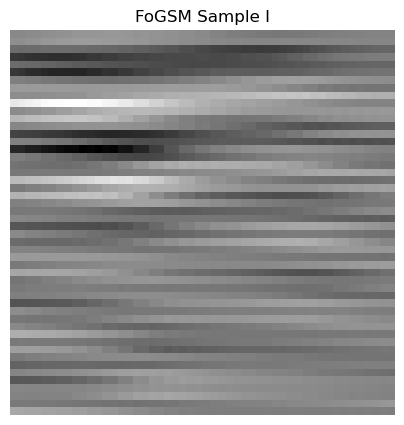

In [124]:
combined_fields_normalised = combined_fields2 / combined_fields2.max()
combined_image = combined_fields_normalised.view(50, 50).detach().numpy()

# Visualise the combined image
plt.figure(figsize=(5,5))
plt.imshow(combined_image, cmap='gray') 
plt.title('FoGSM Sample I')
plt.axis("off")
plt.show()


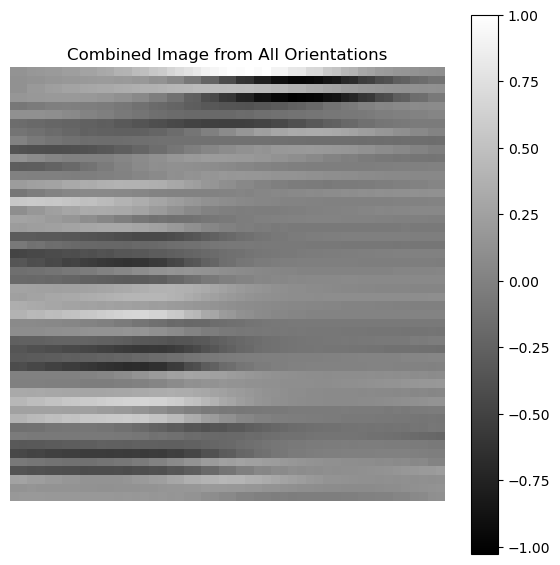

In [43]:
# Visualise the generated image
model.visualise(combined_fields2)

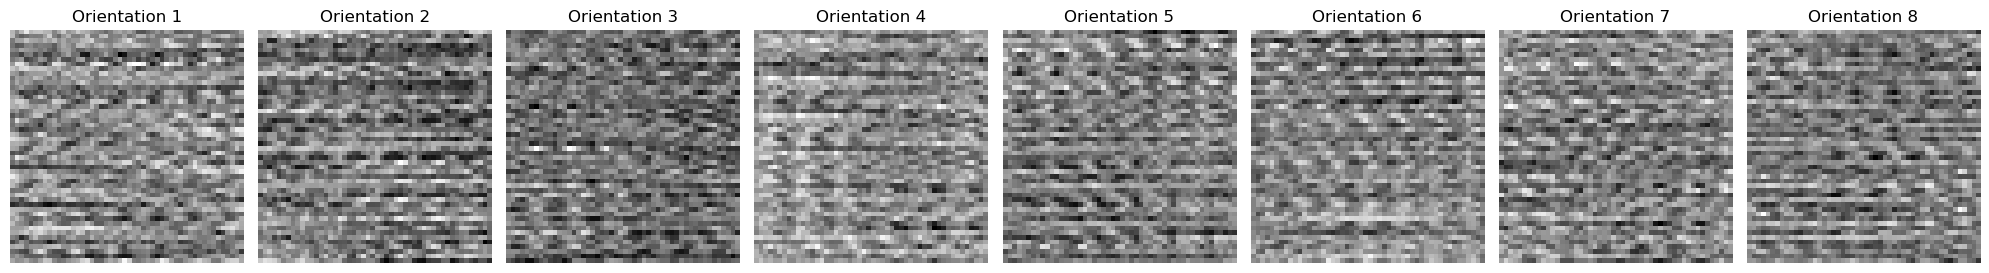

In [ ]:
reshaped_feature_fields = features.reshape(8, grid_size, grid_size)

# Visualising each 10x10 grid for each orientation
fig, axes = plt.subplots(1, 8, figsize=(20, 5))
for i in range(8):
    ax = axes[i]
    ax.imshow(reshaped_feature_fields[i], cmap='gray')
    ax.set_title(f'Orientation {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()